In [23]:
# Plant Leaf Classification using Keras deep learning (MLP)
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [24]:
leaf_data = pd.read_csv('C:\Ekundayo\project@futa\leaf_data.csv')

In [25]:
leaf_data.head()

,class,s[ecies,Eccentricity,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average intensity,Average contrast,smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [26]:
#Selecting the necessary features as input

In [27]:
X_leaf = leaf_data[["Aspect ratio", "Elongation", "Solidity", "Stochastic convexity",
             "Isoperimetric factor", "Max Ident Depth", "Lobedness","Average contrast", "Eccentricity","smoothness"]]

In [28]:
X_leaf.head()

,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average contrast,Eccentricity,smoothness
0,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.127950,0.72694,0.016108
1,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.090476,0.74173,0.008119
2,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.057445,0.76722,0.003289
3,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.065491,0.73797,0.004271
4,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.045339,0.82301,0.002051


In [29]:
#Selecting the necessary features as output

In [30]:
Y_leaf=leaf_data[["class"]]

In [31]:
Y_leaf

,class
0,1
1,1
2,1
3,1
4,1
...,...
359,16
360,16
361,16
362,16


In [32]:
#Preprocessing the input data to avoid bias

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(X_leaf)
X_data = scaler.transform(X_leaf)

In [34]:
X_data

array([[0.07621345, 0.22246849, 0.99001783, ..., 0.37429134, 0.65494908,
        0.20592494],
       [0.08460736, 0.27635811, 0.98243216, ..., 0.22089734, 0.67445787,
        0.09459891],
       [0.09223523, 0.31810807, 0.97456922, ..., 0.08569008, 0.70808051,
        0.02728348],
       ...,
       [0.0356619 , 0.35920614, 0.90552585, ..., 0.15706982, 0.48988287,
        0.05915463],
       [0.03184796, 0.43931624, 0.80855615, ..., 0.27568267, 0.53430855,
        0.13017   ],
       [0.03729178, 0.40486745, 0.83937413, ..., 0.0928739 , 0.55409434,
        0.03011663]])

In [35]:
#Encoding class label for output

In [36]:
Y_data = np_utils.to_categorical(Y_leaf)

In [37]:
Y_data

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [38]:
#Creating keras model
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[10]),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(17, activation = "softmax")
])


In [39]:
model.compile(optimizer = "Adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
             )

In [54]:
X_train, X_test,Y_train,Y_test = train_test_split(X_data,Y_data, test_size=0.3)

In [68]:
history = model.fit(X_train, Y_train, epochs =500)

Epoch 1/500
8/8 [==============================] - 0s 9ms/step - loss: 3.2785e-04 - accuracy: 1.0000
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 3.5168e-04 - accuracy: 1.0000
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 3.1780e-04 - accuracy: 1.0000
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 3.1086e-04 - accuracy: 1.0000
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 3.1587e-04 - accuracy: 1.0000
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 3.0254e-04 - accuracy: 1.0000
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 3.5468e-04 - accuracy: 1.0000
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 2.8455e-04 - accuracy: 1.0000
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 3.4314e-04 - accuracy: 1.0000
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 3.7182e-04 - accura

In [69]:
# Model Accuracy
traing_data_accuracy = model.evaluate(X_train, Y_train)
print("Training Data Accuracy is", traing_data_accuracy)
test_data_accuracy = model.evaluate(X_test, Y_test)
print("Test Data Accuracy is", test_data_accuracy)

8/8 [==============================] - 0s 4ms/step - loss: 6.3361e-05 - accuracy: 1.0000
Training Data Accuracy is [6.336054502753541e-05, 1.0]
4/4 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9455
Test Data Accuracy is [0.1549985706806183, 0.9454545378684998]


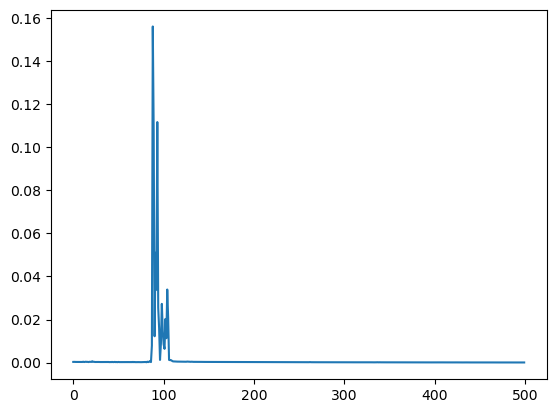

In [70]:
# Plotting loss graph
plt.plot(history.history["loss"])

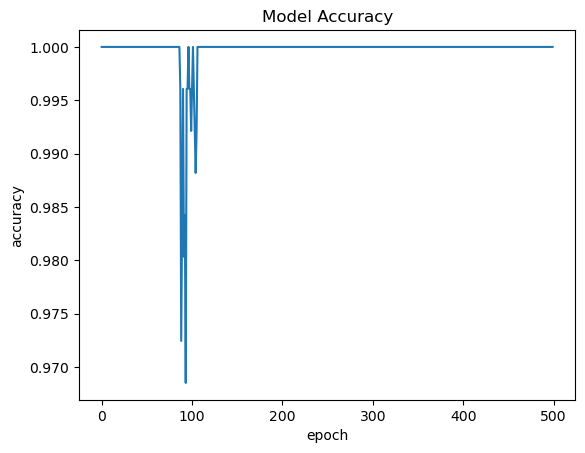

In [71]:
#  Model Accuracy @ each epoch graph
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()